<a href="https://colab.research.google.com/github/9C0c0/H-C-M-Y-X-L-NH/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import files
uploaded = files.upload()

Saving bird.png to bird.png


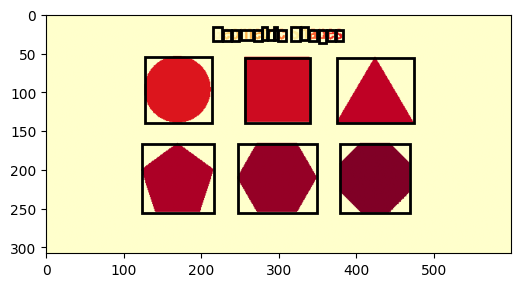

In [4]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

data = Image.open('geometric.png').convert('L')
a = np.asarray(data)
# performing Otsu's thresholding
thres = threshold_otsu(a)
# pixels with intensity greater than theshold are kept
b = a > thres
# labelling is performed on b
c = label(b)
cl = Image.fromarray(c)
iio.imwrite('label_output.png', np.array(cl))
# on the labelled image c, regionprops is performed
properties = ['Area', 'Centroid', 'BoundingBox']
d = regionprops(c)

# the following command creates an empty plot of
# dimension 6 inch by 6 inch
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
ax.imshow(c, cmap='YlOrRd')

for i in d:
    lr, lc, ur, uc = i['BoundingBox']  # ✔️ Gán đúng thứ tự biến
    rec_width = uc - lc
    rec_height = ur - lr
    rect = mpatches.Rectangle((lc, lr), rec_width, rec_height,
                              fill=False, edgecolor='black', linewidth=2)
    ax.add_patch(rect)
plt.show()


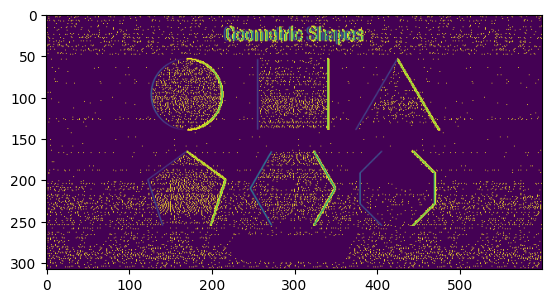

In [5]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu
data = Image.open('geometric.png').convert('L')
bmg = abs(data - nd.shift(data, (0, 1), order=0))
plt.imshow(bmg)
plt.show()


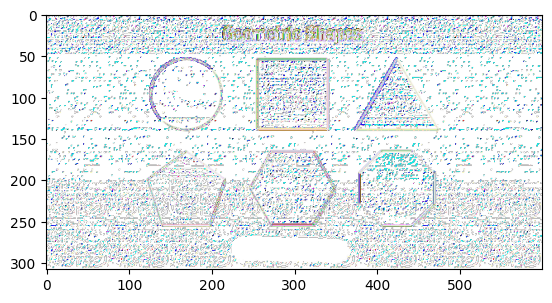

In [6]:
from PIL import Image
import numpy as np
import cv2
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu
data = Image.open('geometric.png')
a = nd.sobel(data, axis=0)  # Tính đạo hàm theo trục dọc (phát hiện biên ngang)
b = nd.sobel(data, axis=1)  # Tính đạo hàm theo trục ngang (phát hiện biên dọc)
bmg = abs(a) + abs(b)  # Tổng độ lớn của hai thành phần biên
plt.imshow(bmg)
plt.show()


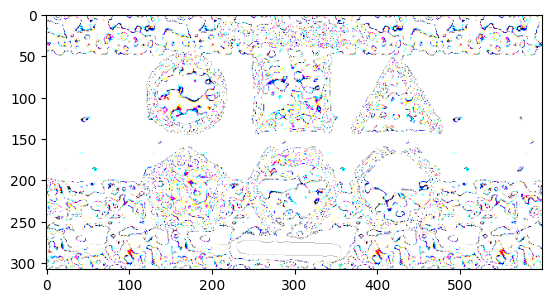

In [7]:
from PIL import Image
import numpy as np
import cv2
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu
def Harris(indata, alpha=0.2):
    x = nd.sobel(indata, 0)  # Gradient theo chiều dọc (x)
    y = nd.sobel(indata, 1)  # Gradient theo chiều ngang (y)

    x1 = x ** 2
    y1 = y ** 2
    xy = abs(x * y)
    x1 = nd.gaussian_filter(x1, 3)
    y1 = nd.gaussian_filter(y1, 3)
    xy = nd.gaussian_filter(xy, 3)
    detC = x1 * y1 - 2 * xy
    trC = x1 + y1
    R = detC - alpha * trC**2
    return R
data = Image.open('geometric.png')
bmg = Harris(data)
plt.imshow(bmg)
plt.show()


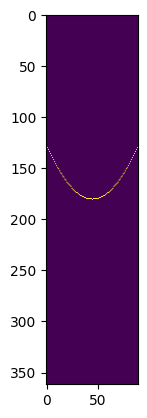

In [10]:
import numpy as np
import cv2
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

def LineHough(data, gamma):
    V, H = data.shape
    R = int(np.sqrt(V * V + H * H))
    ho = np.zeros((R, 90), float)
    w = data + 0
    ok = 1
    theta = np.arange(90)/180.0 * np.pi
    tp = np.arange(90).astype(float)
    while ok:
        mx = w.max()
        if mx < gamma:
            ok = 0
        else:
            y, h = divmod(w.argmax(), H)
            V = V - y
            H = H - h
            x = h
            rh = x * np.cos(theta) + y * np.sin(theta)
            for i in range(len(rh)):
                if 0 <= rh[i] < R and 0 <= tp[i] < 90:
                    ho[int(rh[i]), int(tp[i])] += mx
            w[y, h] = 0
    return ho

data = np.zeros((256, 256))
data[128, 128] = 1
bmg = LineHough(data, 0.5)
plt.imshow(bmg)
plt.show()

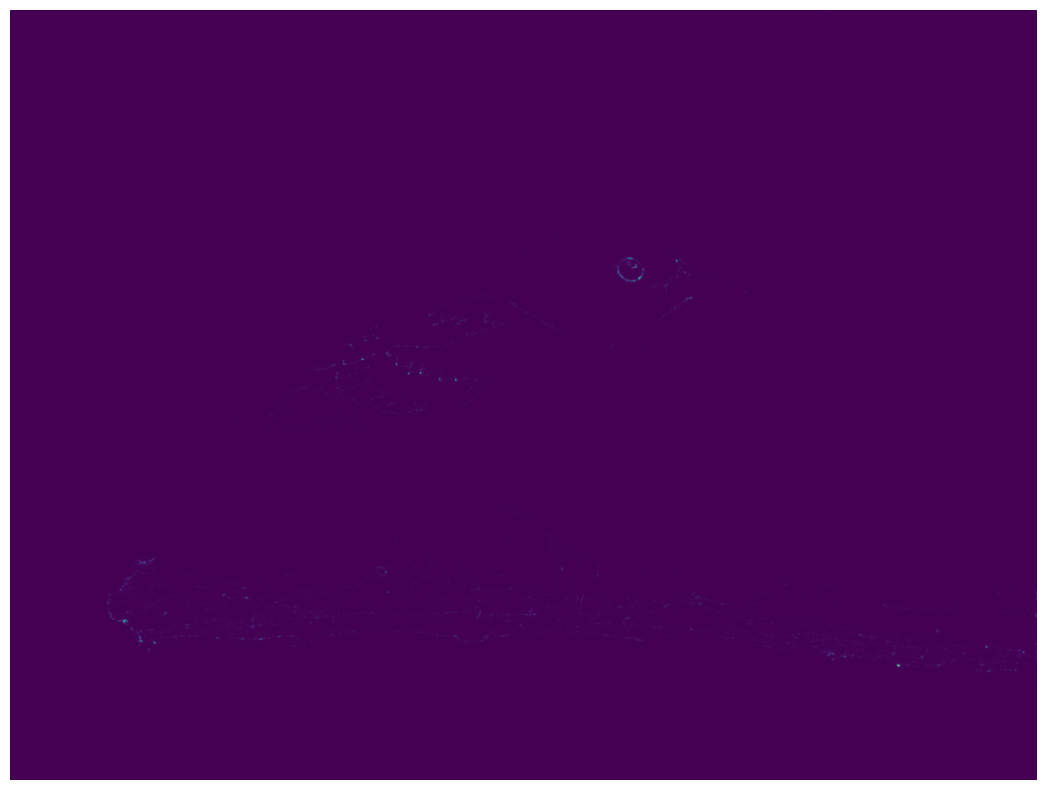

In [13]:
from PIL import Image
import numpy as np
import cv2
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.feature import corner_harris
from skimage.color import rgb2gray

data = iio.imread('bird.png')
image_gray = rgb2gray(data)
coordinate = corner_harris(image_gray, k = 0.001)

plt.figure(figsize=(20,10))
plt.imshow(coordinate)
plt.axis('off')
plt.show()


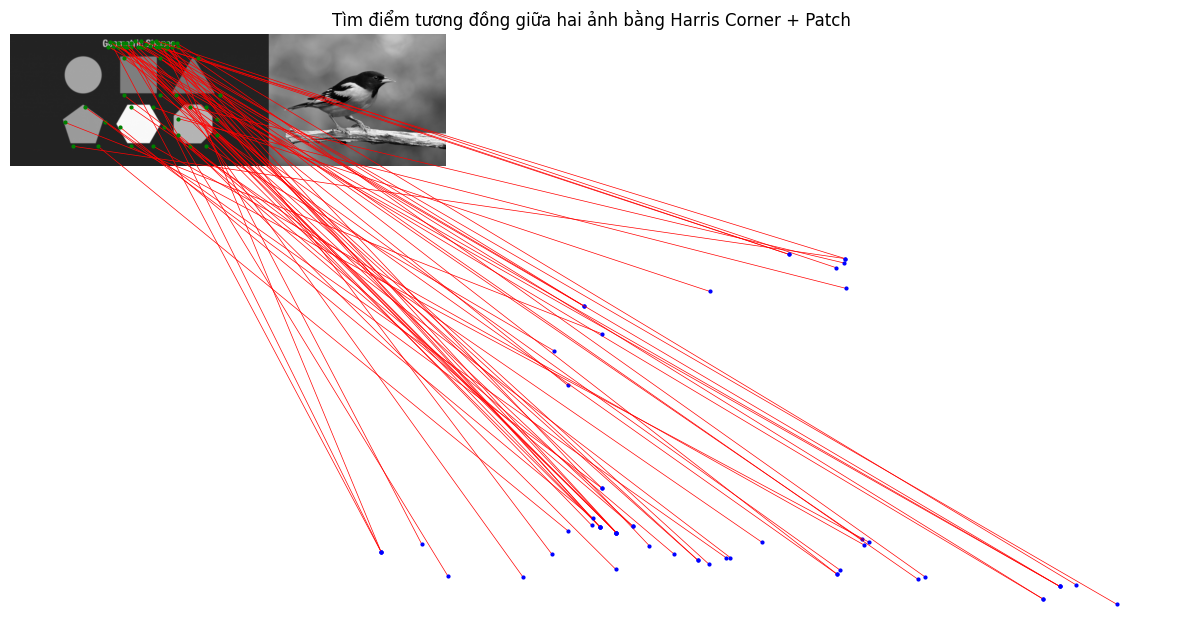

In [17]:
from skimage import io, color
from skimage.feature import corner_harris, corner_peaks
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# Bước 1: Đọc ảnh và chuyển về ảnh xám
img1 = io.imread('geometric.png')
img2 = io.imread('bird.png')
gray1 = color.rgb2gray(img1[:, :, :3])
gray2 = color.rgb2gray(img2[:, :, :3])

# Bước 2: Phát hiện điểm góc bằng Harris
corners1 = corner_peaks(corner_harris(gray1), min_distance=5, threshold_rel=0.01)
corners2 = corner_peaks(corner_harris(gray2), min_distance=5, threshold_rel=0.01)

# Bước 3: Trích xuất patch 9x9 quanh mỗi điểm
def extract_patches(image, points, patch_size=9):
    half = patch_size // 2
    desc, pts = [], []
    for y, x in points:
        if y - half < 0 or y + half >= image.shape[0] or x - half < 0 or x + half >= image.shape[1]:
            continue
        patch = image[y-half:y+half+1, x-half:x+half+1]
        desc.append(patch.flatten())
        pts.append((y, x))
    return np.array(desc), np.array(pts)

desc1, pts1 = extract_patches(gray1, corners1)
desc2, pts2 = extract_patches(gray2, corners2)

# Bước 4: So khớp đặc trưng bằng khoảng cách Euclidean
dists = cdist(desc1, desc2)             # Tính khoảng cách
matches = np.argmin(dists, axis=1)      # Tìm điểm gần nhất
from skimage.transform import resize

def resize_to_same_height(img1, img2, height=300):
    h1, w1 = img1.shape
    h2, w2 = img2.shape
    new_w1 = int(w1 * height / h1)
    new_w2 = int(w2 * height / h2)
    img1_resized = resize(img1, (height, new_w1), anti_aliasing=True)
    img2_resized = resize(img2, (height, new_w2), anti_aliasing=True)
    return img1_resized, img2_resized

# Resize cả hai ảnh
gray1, gray2 = resize_to_same_height(gray1, gray2)

# Vẽ kết quả matching
fig, ax = plt.subplots(figsize=(15, 8))
combined = np.hstack((gray1, gray2))
ax.imshow(combined, cmap='gray')
ax.axis('off')

for i, m in enumerate(matches):
    y1, x1 = pts1[i]
    y2, x2 = pts2[m]
    ax.plot([x1, x2 + gray1.shape[1]], [y1, y2], 'r-', linewidth=0.5)
    ax.plot(x1, y1, 'go', markersize=2)
    ax.plot(x2 + gray1.shape[1], y2, 'bo', markersize=2)

plt.title("Tìm điểm tương đồng giữa hai ảnh bằng Harris Corner + Patch")
plt.show()
